In [1]:
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec
import pandas as pd
import nltk
import xml.etree.ElementTree as ET
import os
import gensim


In [2]:
path = '../stopwords_filtered/Biyoloji.xml'
ozetceler = []
tree = ET.parse(path)
root = tree.getroot()
for ozetce in root:
    ozetce = ozetce.text
    ozetce = str(ozetce)
    ozetceler.append(ozetce)

In [3]:
print(ozetceler)

[' araştırmak 2002 2003 yıl hidrografik açı havza özellik göstermek yaklaşık 1900 km2 lik yüzölçüme sahip Erzurum Tortum Uzundere ilçe içeri yer alan Tortum çay havza çalışmak alan fitocoğrafik konum A8 A9 kare içeri yer almak araştırmak alan aynı zaman Turan Sibirya floristik bölge kesişim nokta araştırmak amaç yöre kent kır mekân peyzaj planlamak tasarım çalışmak kullanmak doğal odun bitki belirlemek araştırmak alan 25 familya 54 odun bitki tür tespit yetişmek ortam özellik bitki fenolojik morfolojik özellik belirlemek değer sonuç bitki tür 30 peyzaj onarım çalışmak 28 inmek karayolu kenar orta refüj otopark planlamak 19 kaya kuru duvar bahçe yer örtmek 39 estetik özellik kullanmak sonuç varmak', ' Azerbaycan dağlık bölge yaymak göstermek 60 familya 194 cins 321 fayda bitki rastlamak araştırmak yıl gerçek bitki 124 süs 60 tıbbî 54 gıda 42 eterik yağ 39 bal vermek 19 vitamin 18 zehir 17 boya 11 yem sımak kauçuk adet sabun içerik belirlemek alan rastlamak bitki toplam sayı Asteraceae L

In [4]:
kelimeler = []
for i in ozetceler:
    kelimeler.append(i.split())

In [5]:
print((kelimeler[117]))


['Seligeria', 'donniana', 'Sm', 'Müll', 'ilk', 'rapor', 'örnek', 'Güney', 'Kızıldağ', 'mil', 'Isparta', 'toplamak', 'araştırmak', 'alan', 'tanıtım', 'örnek', 'karakteristik', 'özellik', 'çizim', 'ekoloji', 'birlikte', 'sunmak']


In [6]:
model =Word2Vec(kelimeler, vector_size =100,window = 20, min_count= 1, sg = 1)

In [7]:
model.wv["Türkiye"]

array([-0.21053104,  0.33068803, -0.22650851, -0.04107036, -0.27209908,
       -0.43260735,  0.22827838,  0.41090858, -0.10709396, -0.07760732,
       -0.03981005, -0.22019571,  0.0432179 , -0.05039217,  0.13891108,
       -0.01666344,  0.03267135, -0.20546862, -0.20345402, -0.49597707,
        0.09553792, -0.02657734,  0.02881648, -0.09898863,  0.04184854,
       -0.02842071, -0.08952919, -0.21905614, -0.06088866, -0.19125697,
        0.1068541 ,  0.09546211,  0.2572642 , -0.16047934, -0.0412805 ,
        0.20305744,  0.03403438, -0.10903807, -0.07379477, -0.2395919 ,
       -0.06232227, -0.2185654 , -0.08831058, -0.24779204,  0.13463902,
       -0.0673755 ,  0.03971843,  0.14009733, -0.12407785,  0.22985423,
       -0.0567969 , -0.21826135, -0.11156438,  0.26631504, -0.07075505,
       -0.00626694,  0.06814039, -0.13282813,  0.0069117 ,  0.13926986,
        0.08165157, -0.02567811,  0.31434384,  0.19814056, -0.09858325,
        0.29907742, -0.25495976,  0.35984495, -0.21753019,  0.10

In [8]:
model.wv.most_similar("Türkiye")

[('Anadolu', 0.9771445393562317),
 ('yeni', 0.9689596891403198),
 ('rapor', 0.9687309861183167),
 ('ilk', 0.9675309062004089),
 ('demek', 0.9633432030677795),
 ('kayıt', 0.9616432785987854),
 ('doğal', 0.9600371718406677),
 ('makale', 0.9598380923271179),
 ('tehlike', 0.9572322368621826),
 ('Güney', 0.9521245956420898)]

In [9]:
model.save("word2vec.model")

In [10]:
model2 = Word2Vec.load("word2vec.model")

In [11]:
model2.wv.most_similar("Türkiye")

[('Anadolu', 0.9771445393562317),
 ('yeni', 0.9689596891403198),
 ('rapor', 0.9687309861183167),
 ('ilk', 0.9675309062004089),
 ('demek', 0.9633432030677795),
 ('kayıt', 0.9616432785987854),
 ('doğal', 0.9600371718406677),
 ('makale', 0.9598380923271179),
 ('tehlike', 0.9572322368621826),
 ('Güney', 0.9521245956420898)]

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [13]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    close_words = model.wv.most_similar(word)
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis = 0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis = 0)
    tsne = TSNE(random_state = 0)
    Y = tsne.fit_transform(word_vectors)
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x,y), xytext = (5, -2), textcoords = "offset points")
    
    plt.show()

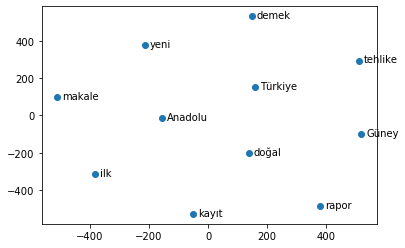

In [14]:
closestwords_tsneplot(model2,"Türkiye")

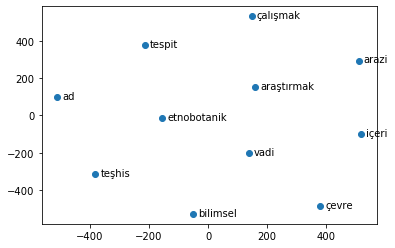

In [15]:
closestwords_tsneplot(model2,"araştırmak")

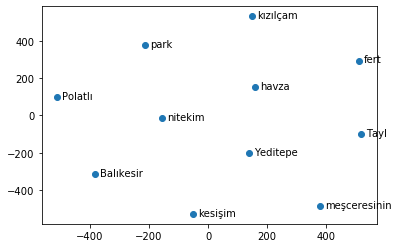

In [16]:
closestwords_tsneplot(model2,"havza")

In [49]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [31]:
w2v_weights = model2.wv.vectors
vocab_size, embedding_size = w2v_weights.shape

print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

Vocabulary Size: 3537 - Embedding Dim: 100


Vocabulary Size: 3537 - Embedding Dim: 100
